In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
%cd C:\Users\ASUS\Desktop\Kaggle

C:\Users\ASUS\Desktop\Kaggle


In [7]:
pwd

'C:\\Users\\ASUS\\Desktop\\Kaggle'

In [8]:
df=pd.read_csv('Heart Failure Prediction\heart_failure_clinical_records_dataset.csv')

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**EDA**

<AxesSubplot:>

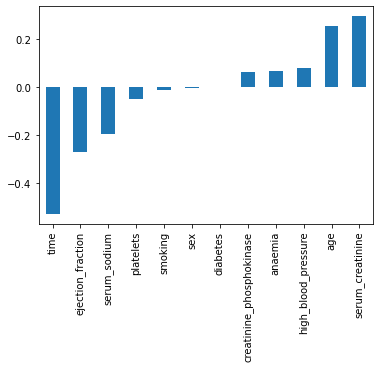

In [11]:
df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values().plot(kind='bar')

In [12]:
df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

Since this is a time-to-event data-set. There are 2 target columns: time and DEATH_EVENT.

DEATH_EVENT encodes whether the patient died (1) or whether they were censored (0). Censoring means that the scientists lost contact with the patient.

time captures the time of the event. That is, the time at which the patient died or were censored.

Using the time column as a feature is wrong. When we deploy our model, no end user will be able to provide you the value of time, since they do not know at what time in the future the patient will die/get censored!

In [13]:
df=df.drop('time', axis=1)

In [14]:
df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values()


ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
Name: DEATH_EVENT, dtype: float64

ejection_fraction, Age and serum_creatinine have a very high corellation with Death. Let us explore them further

In [15]:
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

<Figure size 864x288 with 0 Axes>

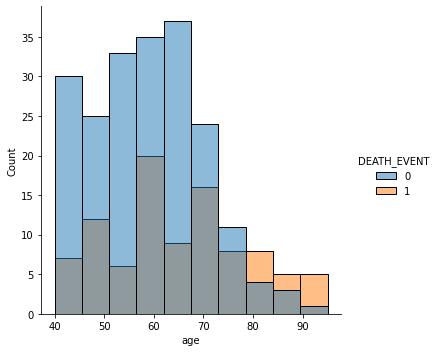

In [16]:
plt.figure(figsize=(12,4))
sns.displot(data=df, x='age',hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

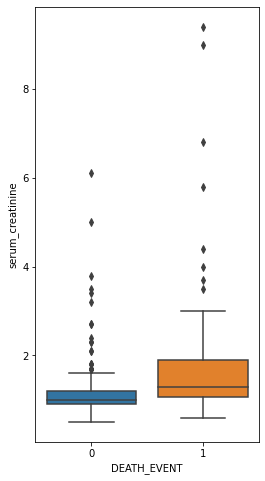

In [17]:
plt.figure(figsize=(4,8))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')

serum_creatinine levels are higher for those who die from Heart Failure

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

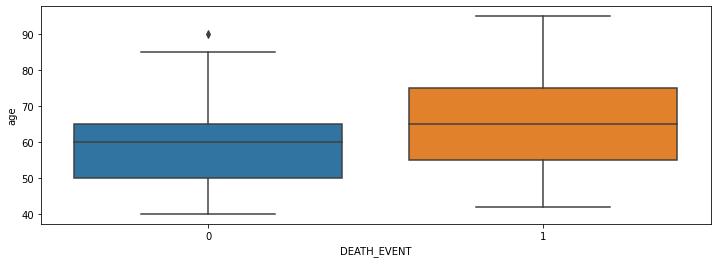

In [18]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='age')

Age also seems to be higher for those who die from Heart Failure

In [19]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

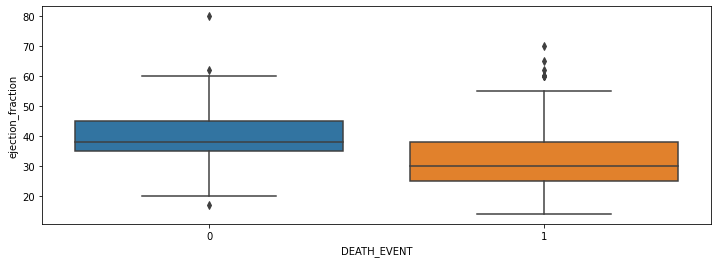

In [20]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')

As less blood leaves the heart, the ejection fraction decreases causing Heart Failure. 

In [21]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

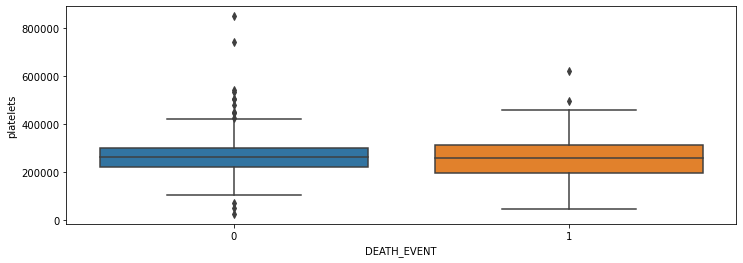

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='platelets')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

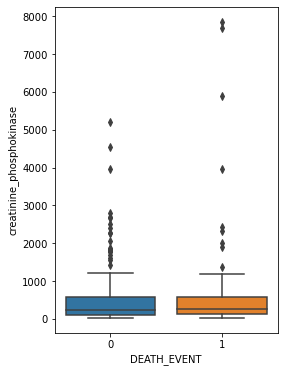

In [23]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='creatinine_phosphokinase')

Not much variation 

In [24]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


<AxesSubplot:>

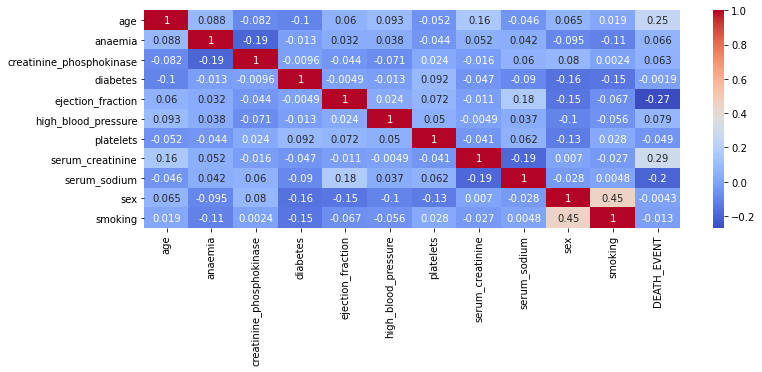

In [25]:
plt.figure(figsize=(12,4))
sns.heatmap(data=df.corr().drop('DEATH_EVENT'), cmap='coolwarm', annot=True)

There are not any features that are correlated with each other. We can move onto Data Cleaning and Preprocessing

**Data PreProcessing**

In [26]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

There are no Null values, we are good to go. 

**Categorical Features**

There seem to be quite a few Categorical features which needs to be transformed so that sklearn will be able to understand them

In [30]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [31]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [33]:
#dummies=pd.get_dummies(df[['anaemia','diabetes','high_blood_pressure','sex','smoking']],drop_first=True )

In [34]:
#df = df.drop(['anaemia','diabetes','high_blood_pressure','sex','smoking'],axis=1)

In [35]:
#df = pd.concat([df,dummies],axis=1)

In [1]:
#df.head()

**Model Creation and Evaluation**

Let's start by Using Random Forest Classifier

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()

In [115]:
X= df.drop('DEATH_EVENT', axis=1)
y=df['DEATH_EVENT']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
X_train = scaler.fit_transform(X_train)

In [118]:
X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=600)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

**Predictions and Evaluation**

Let's predict off the y_test values and evaluate our model.

In [42]:
from sklearn.metrics import classification_report,confusion_matrix


In [43]:
predictions = rfc.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.89      0.76        57
           1       0.71      0.36      0.48        42

    accuracy                           0.67        99
   macro avg       0.68      0.63      0.62        99
weighted avg       0.68      0.67      0.64        99



The performance is very poor and thus I have decided to remove features which aren't much correllated to Death

In [64]:
abs(df.corr()['DEATH_EVENT'].drop('DEATH_EVENT')).sort_values()

diabetes                    0.001943
sex                         0.004316
smoking                     0.012623
platelets                   0.049139
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
serum_sodium                0.195204
age                         0.253729
ejection_fraction           0.268603
serum_creatinine            0.294278
Name: DEATH_EVENT, dtype: float64

Sex and Diabetes are hardly correlated with Death and thus I will remove the less correllated features and train the model

In [88]:
X=df.drop(['diabetes','sex','DEATH_EVENT','smoking'], axis=1)
y=df['DEATH_EVENT']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [76]:
rfc = RandomForestClassifier(n_estimators=600)

In [77]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [78]:
predictions = rfc.predict(X_test)

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76        57
           1       0.75      0.36      0.48        42

    accuracy                           0.68        99
   macro avg       0.70      0.63      0.62        99
weighted avg       0.70      0.68      0.65        99



We have got a decent score here. Thanks!